In [2]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [1]:
df = pd.read_csv("data/pr-clean-data.csv") #create data frame
text = df['summary']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

NameError: name 'pd' is not defined

In [9]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [10]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<64 unique tokens: ['kepala', 'smp', 'warga', 'bandung', 'polisi']...>


In [11]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

180
[]


In [12]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

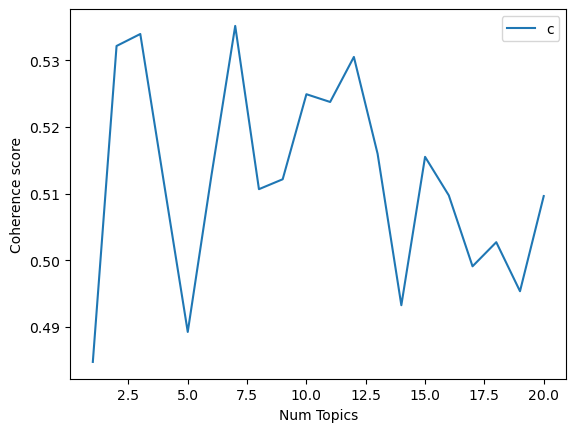

In [13]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.484782
Num Topics = 2  has Coherence Value of 0.532143
Num Topics = 3  has Coherence Value of 0.533939
Num Topics = 4  has Coherence Value of 0.51156
Num Topics = 5  has Coherence Value of 0.489279
Num Topics = 6  has Coherence Value of 0.512777
Num Topics = 7  has Coherence Value of 0.53515
Num Topics = 8  has Coherence Value of 0.510678
Num Topics = 9  has Coherence Value of 0.512163
Num Topics = 10  has Coherence Value of 0.524912
Num Topics = 11  has Coherence Value of 0.52375
Num Topics = 12  has Coherence Value of 0.530501
Num Topics = 13  has Coherence Value of 0.515979
Num Topics = 14  has Coherence Value of 0.493284
Num Topics = 15  has Coherence Value of 0.515523
Num Topics = 16  has Coherence Value of 0.509747
Num Topics = 17  has Coherence Value of 0.499116
Num Topics = 18  has Coherence Value of 0.502731
Num Topics = 19  has Coherence Value of 0.495379
Num Topics = 20  has Coherence Value of 0.509645


In [15]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=7) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.147*"jawa_barat" + 0.075*"jawa" + 0.073*"barat" + 0.066*"daerah" + 0.055*"perempuan" + 0.053*"bandung" + 0.045*"polisi" + 0.044*"jabar" + 0.041*"kabupaten" + 0.040*"mengungkap"
Topic: 1 Word: 0.094*"konser" + 0.086*"gegara" + 0.065*"masyarakat" + 0.057*"air" + 0.048*"smp" + 0.041*"acara" + 0.037*"daerah" + 0.030*"tewas" + 0.027*"tawang_kota" + 0.027*"tawang"
Topic: 2 Word: 0.071*"jalan" + 0.053*"motor" + 0.048*"kamil" + 0.048*"ridwan_kamil" + 0.048*"ridwan" + 0.047*"jabar" + 0.042*"kebakaran" + 0.032*"wilayah" + 0.029*"lantai" + 0.029*"sepeda"
Topic: 3 Word: 0.092*"warga" + 0.071*"ri" + 0.064*"lomba" + 0.059*"perlombaan" + 0.055*"rp" + 0.052*"polisi" + 0.051*"kemerdekaan" + 0.045*"ditangkap" + 0.035*"nama" + 0.032*"acara"
Topic: 4 Word: 0.134*"pria" + 0.065*"bandung" + 0.045*"mabuk" + 0.044*"jabar" + 0.042*"polisi" + 0.038*"warga" + 0.031*"jawa_barat" + 0.029*"air" + 0.028*"wilayah" + 0.027*"masjid"
Topic: 5 Word: 0.068*"kampung" + 0.064*"kabupaten" + 0.063*"kecamatan"

In [16]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [23]:
print("Corpus Length:", len(corpus_tfidf))

Corpus Length: 180


In [28]:
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])

In [29]:
df

,Topic,Word,P
0,0,jawa_barat,0.146777
1,0,jawa,0.074941
2,0,barat,0.073287
3,0,daerah,0.066393
4,0,perempuan,0.055231
...,...,...,...
65,6,aksi,0.038799
66,6,kepala,0.037111
67,6,ditemukan,0.035771
68,6,mabuk,0.031406


/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


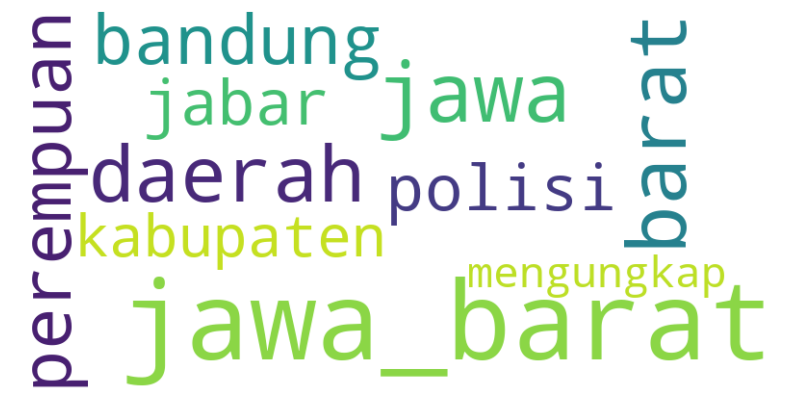

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


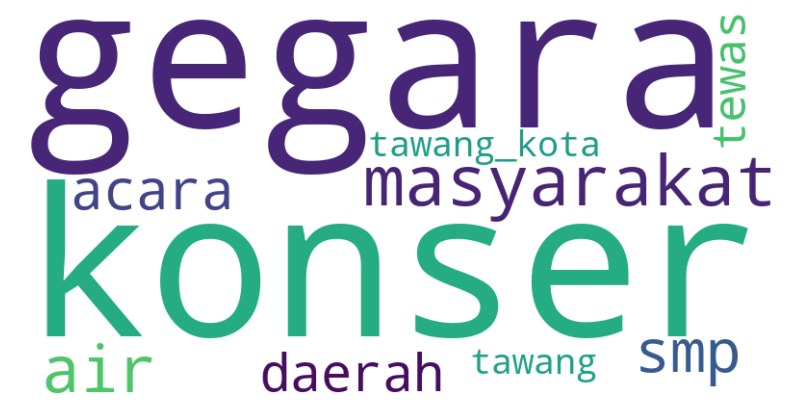

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


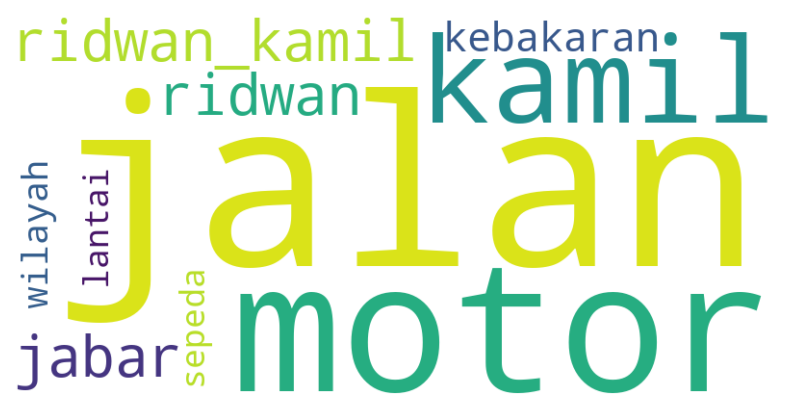

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


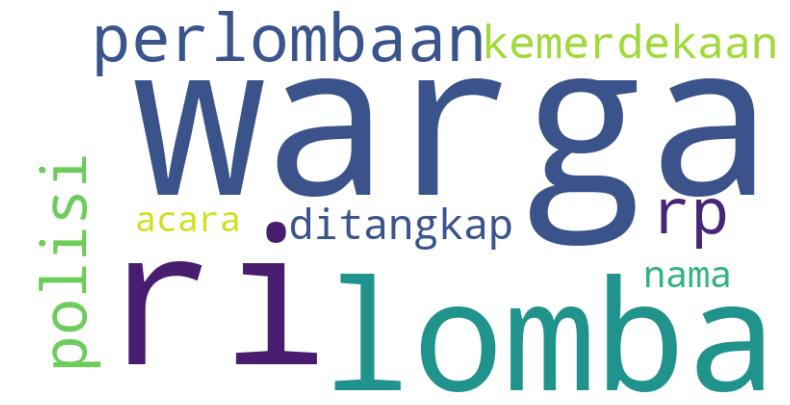

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


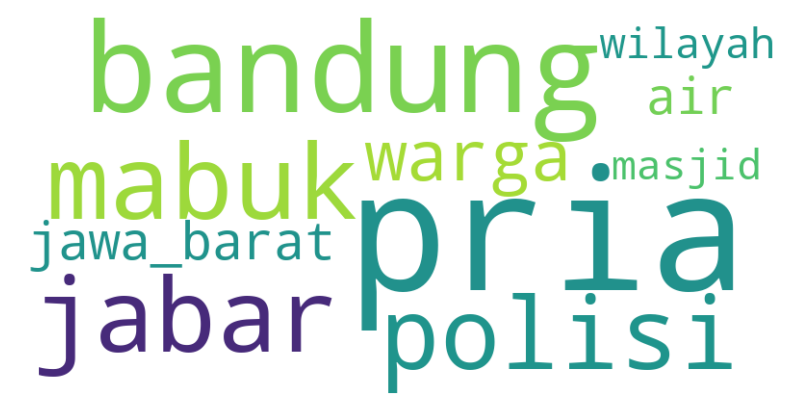

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


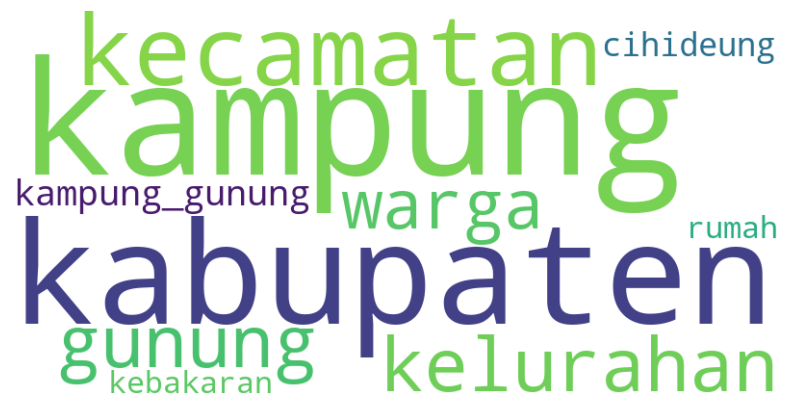

/home/peminumyakult/anaconda3/envs/suapp/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


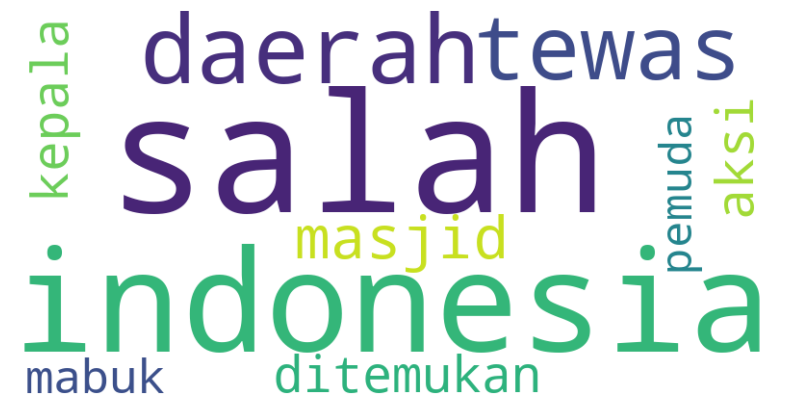

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already loaded the top words data into a DataFrame 'df'

# Create a function to generate a word cloud for a specific topic
def generate_word_cloud(topic_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate word clouds for each topic
for topic_id in range(model.num_topics):
    topic_words = dict(df[df['Topic'] == topic_id].set_index('Word')['P'])
    generate_word_cloud(topic_words)


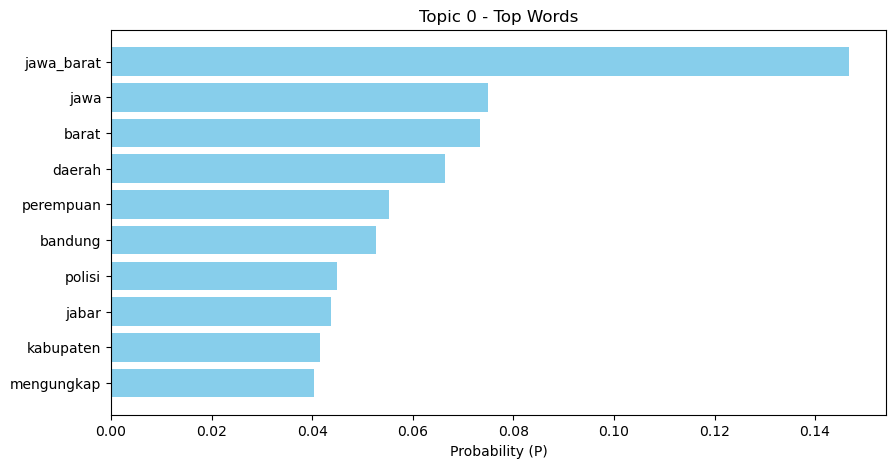

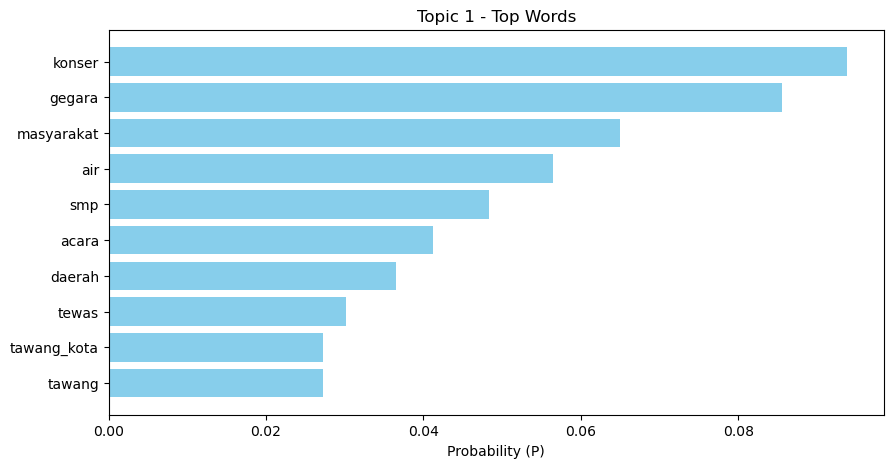

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Anggap Anda sudah memiliki data top words dalam DataFrame 'df'

# Iterasi melalui setiap topik dan membuat bar chart
for topic_id in range(model.num_topics):
    topic_words = df[df['Topic'] == topic_id]
    
    # Ambil kata-kata dan probabilitas
    words = topic_words['Word']
    probabilities = topic_words['P']
    
    # Buat bar chart
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(words)), probabilities, color='skyblue')
    plt.yticks(range(len(words)), words)
    plt.xlabel('Probability (P)')
    plt.title(f'Topic {topic_id} - Top Words')
    plt.gca().invert_yaxis()  # Reverse the order for better readability
    plt.show()
